# `RNN` and `LSTM` Hands-on Exercise on `Tesla Stock Prices`
`Disclaimer: No trading tips given`

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
### 1. Load the data
os.getcwd()

'C:\\Users\\think\\OneDrive\\TRAINING\\INTELLIPAAT\\DEEP LEARNING\\08. AI and DL IITR-08Jun2025(E)'

In [86]:
data = pd.read_csv("Tesla.csv.csv")

In [87]:
data.sample(5)

,Date,Open,High,Low,Close,Volume,Adj Close
639,1/11/2013,34.040001,34.040001,32.110001,32.910000,1563200,32.910000
678,3/11/2013,38.869999,39.439999,38.650002,39.099998,1579500,39.099998
184,3/22/2011,22.730000,22.860001,22.000000,22.190001,582900,22.190001
1389,1/5/2016,226.360001,226.889999,220.000000,223.429993,3186800,223.429993
241,6/13/2011,28.070000,28.879999,27.879999,28.430000,1713400,28.430000




1. **Open:** The opening price of the stock on a particular trading day. This is the price at which the first trade is executed when the market opens.
2.  **High:** The highest price at which the stock traded during the `trading day`. It indicates the maximum value that traders were willing to pay for the stock on that day.
3. **Low:** The lowest price at which the stock traded during the trading day. This represents the minimum value for the stock within the trading day.
4. **Close:** The closing price of the stock for the day. It is the last price at which the stock was traded before the market closed. This is one of the most commonly reported and used prices because it reflects the final consensus value of the stock for the day.
5. **Volume:** The total number of shares or contracts traded for the stock during the trading day. It reflects the level of activity or liquidity for the stock. Higher volume indicates more trading activity and, typically, higher investor interest.
6. **Adj Close (Adjusted Close):** This is the closing price adjusted for corporate actions like `stock splits`, `dividends`, and `new stock offerings`. Adjusted close provides a more accurate reflection of a stock’s value and price movements over time because it accounts for events that could affect the stock price directly.

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


#### Convert the column `date` into proper `date time format`

In [89]:
data['Date'] = pd.to_datetime(data['Date']) #converts date into date time format

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [91]:
data.describe()

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187


### Let us check if there is any `missing data`

In [92]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

### Plot the `open price` distribution

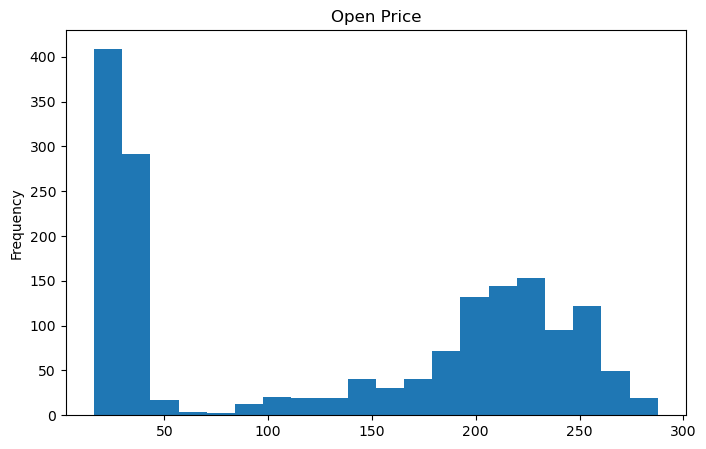

In [93]:
plt.subplots(figsize = (8,5))
data['Open'].plot(kind='hist', bins=20, title='Open Price')
plt.show()

In [94]:
print("Number of trading days in Tesla data:", data['Date'].nunique())

Number of trading days in Tesla data: 1692


### 2. Splitting the `Tesla data` into `training` and `validation` sets 

In [95]:
length_data = len(data) # rows in the data
length_data

1692

In [96]:
split_ratio = 0.70 #70% of the data is reserved for training and rest 30% is for validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train

In [97]:
print("Data Length:", length_data)
print("Train data length:", length_train)
print("Validation data length:", length_validation)

Data Length: 1692
Train data length: 1184
Validation data length: 508


In [98]:
508/1692

0.30023640661938533

## Objective: To predict the `opening price` of the `Tesla Stock`

In [99]:
train_data = data[:length_train].iloc[:,:2]
train_data.head()

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000


In [100]:
train_data.tail()

,Date,Open
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994
1183,2015-03-12,193.750000


In [101]:
type(train_data)

pandas.core.frame.DataFrame

In [102]:
validation_data = data[length_train:].iloc[:,:2]
validation_data.head()

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000


In [103]:
validation_data.tail()

,Date,Open
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994
1691,2017-03-17,264.000000


### 3. Creating `ready to use training data set`
- Convert `1D` array to `2D` array

In [104]:
dataset_train = train_data.Open.values
dataset_train = np.reshape(dataset_train, (-1,1))

In [105]:
dataset_train

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [188.460007],
       [191.149994],
       [193.75    ]])

### 4. Normalization/Feature Scaling

- dataset values will be in between `0` and `1` after scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [107]:
##### Scaling the train dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

#### `Before` Scaling

In [108]:
dataset_train.min(), dataset_train.max()

(16.139999, 287.670013)

#### `After` Scaling

In [109]:
dataset_train_scaled.min(), dataset_train_scaled.max()

(0.0, 1.0)

### Let us visualize the `line chart` for `Tesla` Stock Open Price

#### `Before` Scaling

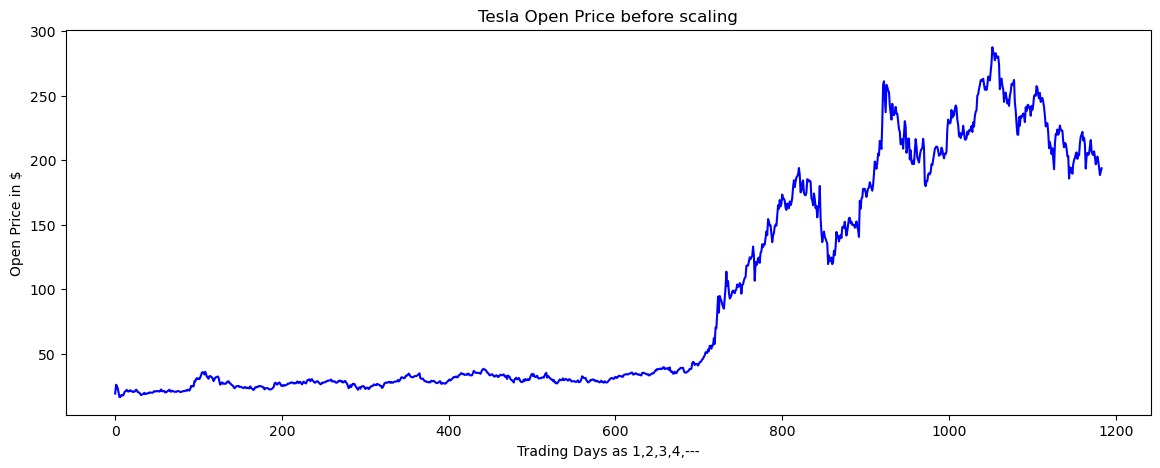

In [110]:
plt.subplots(figsize=(14,5))
plt.plot(dataset_train, color='blue', label='Tesla Stock Open Price')
plt.title("Tesla Open Price before scaling")
plt.xlabel("Trading Days as 1,2,3,4,---")
plt.ylabel("Open Price in $")
plt.show()


In [111]:
#### `After` Scaling

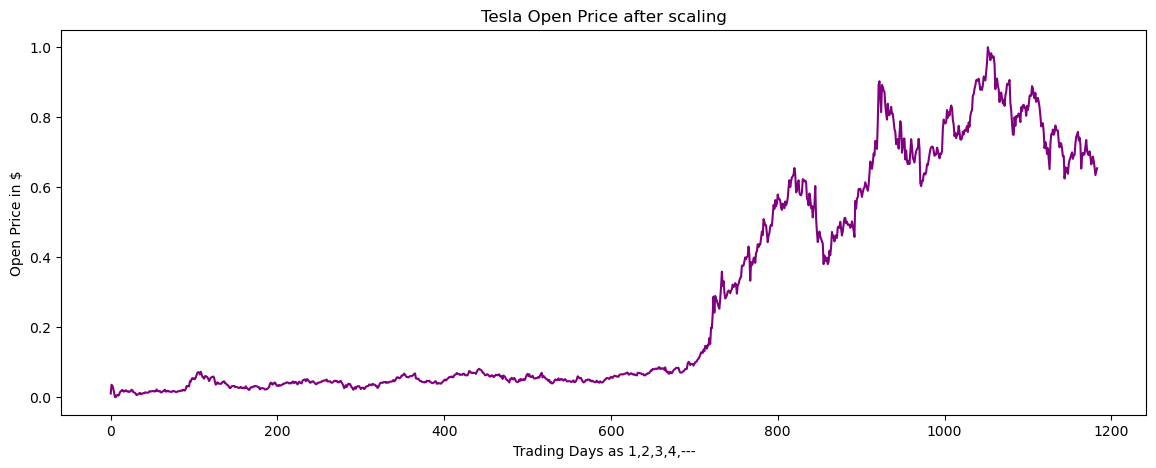

In [112]:
plt.subplots(figsize=(14,5))
plt.plot(dataset_train_scaled, color='purple', label='Tesla Stock Open Price')
plt.title("Tesla Open Price after scaling")
plt.xlabel("Trading Days as 1,2,3,4,---")
plt.ylabel("Open Price in $")
plt.show()


- **Why scaling ?** Wide range of `Open` prices lead to `unstable learning` and can go in the direction of `vanishing gradients` problem

In [113]:
X_train = []
y_train = []

time_step =50 #currently time step is at 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i - time_step: i , 0])
    y_train.append(dataset_train_scaled[i,0])

In [114]:
### convert list into arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [115]:
print("Shape of X_train before reshape:", X_train.shape)
print("Shape of y_train before reshape:", y_train.shape)

Shape of X_train before reshape: (1134, 50)
Shape of y_train before reshape: (1134,)


In [116]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1134, 50, 1)
Shape of y_train after reshape : (1134, 1)


### 5. Build the `RNN` model

In [117]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

### Keras RNN documentation: https://keras.io/api/layers/recurrent_layers/simple_rnn/

In [50]:
### Initialize the RNN Object
regressor = Sequential() #initializing the regressor object - sequential object

### Adding the first RNN layer and also the drop regularization
regressor.add(
    SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape = (X_train.shape[1], 1)))

# Adding second RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50,activation = "tanh",return_sequences = True))
regressor.add(Dropout(0.2)) # dropping out 20% 

# Adding third RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50,activation = "tanh",return_sequences = True))
regressor.add(Dropout(0.2))

# Adding fourth RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50)) #default is tanh
regressor.add( Dropout(0.2))


### Adding the output layer
regressor.add(Dense(units=1)) # a fully connected layer with one neuron is added as the output layer

#### Compiling the RNN model
regressor.compile(optimizer = 'adam', loss="mean_squared_error", metrics=['accuracy'])

### Training the RNN
history = regressor.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.0000e+00 - loss: 0.4605
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0015 - loss: 0.1685
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.4863e-04 - loss: 0.1175
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 7.4746e-04 - loss: 0.0657
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0020 - loss: 0.0441
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 4.7667e-05 - loss: 0.0317
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0000e+00 - loss: 0.0267
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0202
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 3.6086e-04 - loss: 0.0156
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 6.9467e-04 - loss: 0.0156
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.0018 - loss: 0.0106
Epoch 12/50
36/36 ━━━━━━━━━━━━━

### Evaluating the model

In [58]:
y_pred = regressor.predict(X_train) #predictions

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [59]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original values
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original values

### Let us visualize the actual vs predicted for `training`

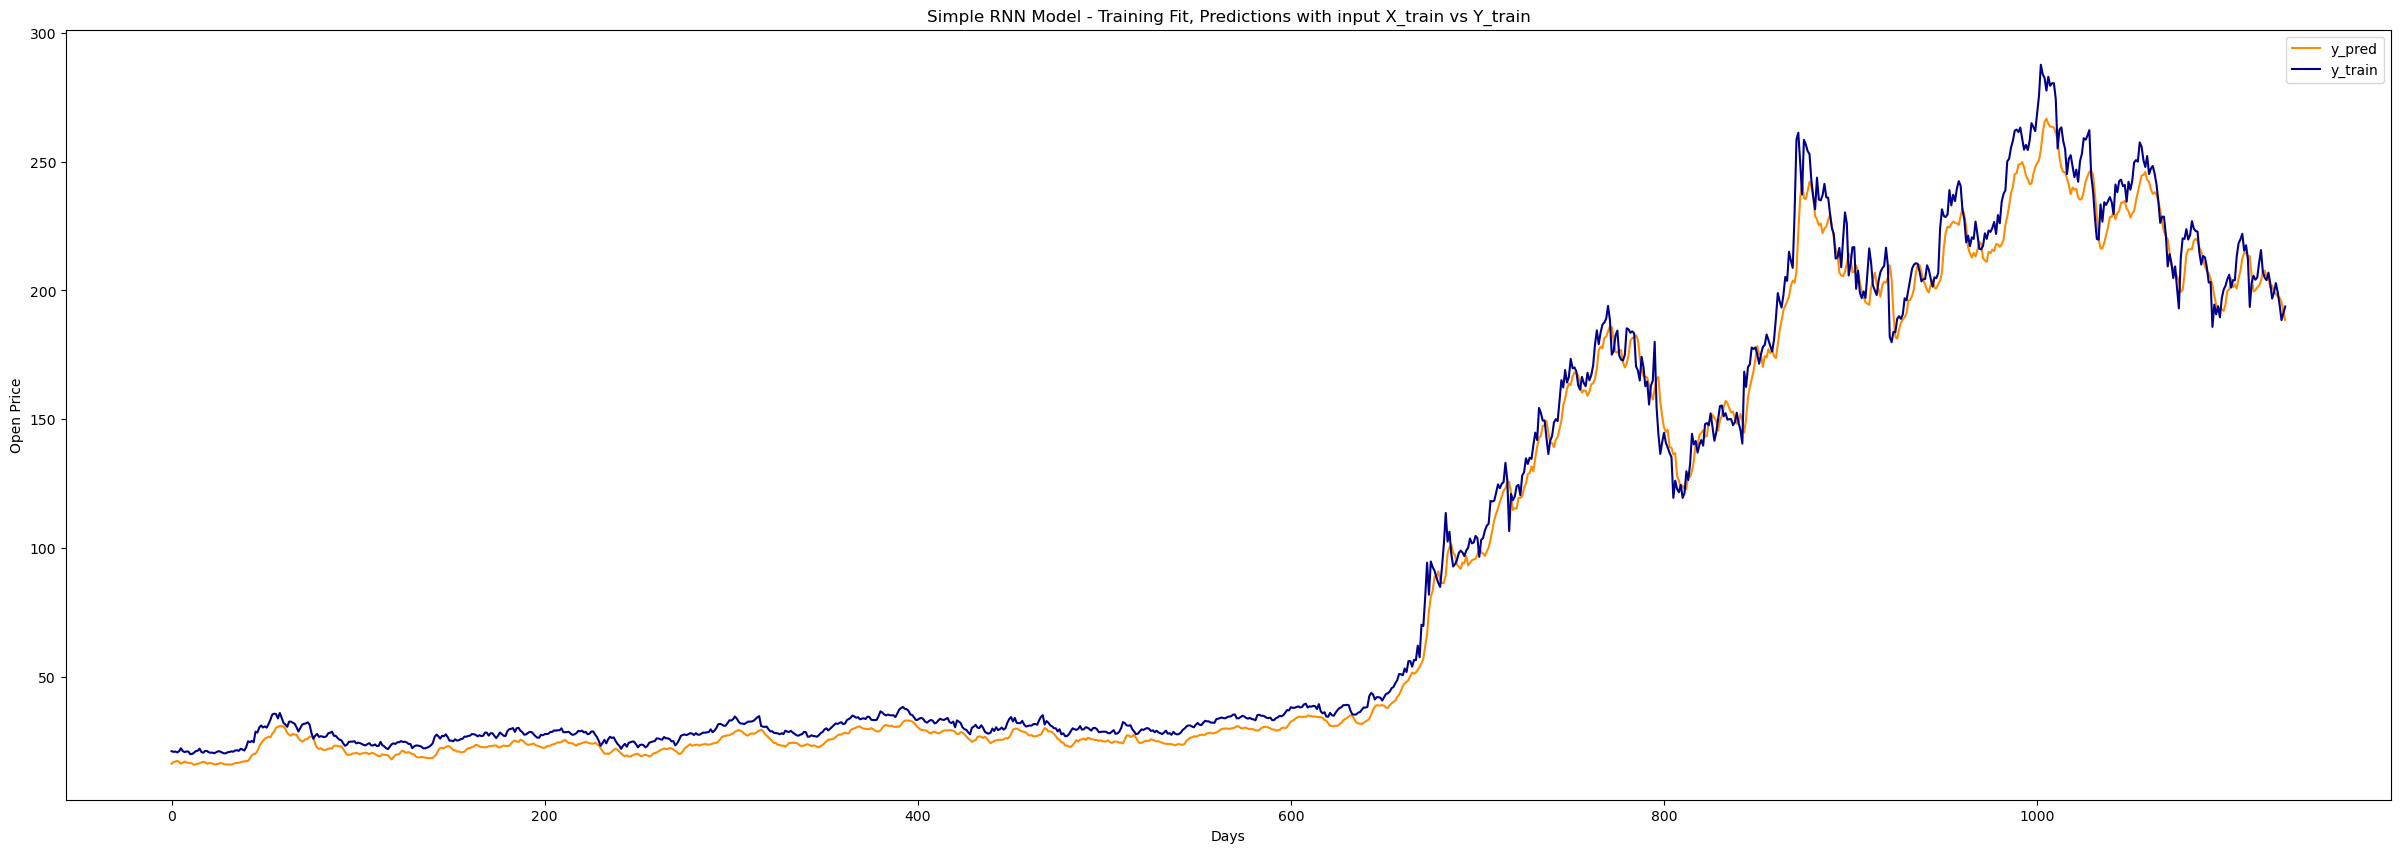

In [62]:
#### visualization
plt.figure(figsize = (30,10))
plt.plot(y_pred, color='darkorange', label="y_pred")
plt.plot(y_train, color="darkblue", label="y_train")
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.title("Simple RNN Model - Training Fit, Predictions with input X_train vs Y_train")
plt.legend()
plt.show()

### Let us create the validation dataset

In [63]:
dataset_validation = validation_data.Open.values #getting open price for validation data and getting it into array
dataset_validation = np.reshape(dataset_validation, (-1,1)) # converting 1D array to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (508, 1)


### 7. Creating test/validation dataset from validation data

In [118]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [119]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (458, 50)
Shape of y_test before reshape : (458,)


In [120]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [121]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (458, 50, 1)
Shape of y_test after reshape : (458, 1)


### 8. Evaluating the `trained model` on the validation dataset

In [68]:
y_pred_of_test = regressor.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [69]:
### Scaling back to original values
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)

In [70]:
y_pred_of_test.min(), y_pred_of_test.max()

(151.29195, 268.26422)

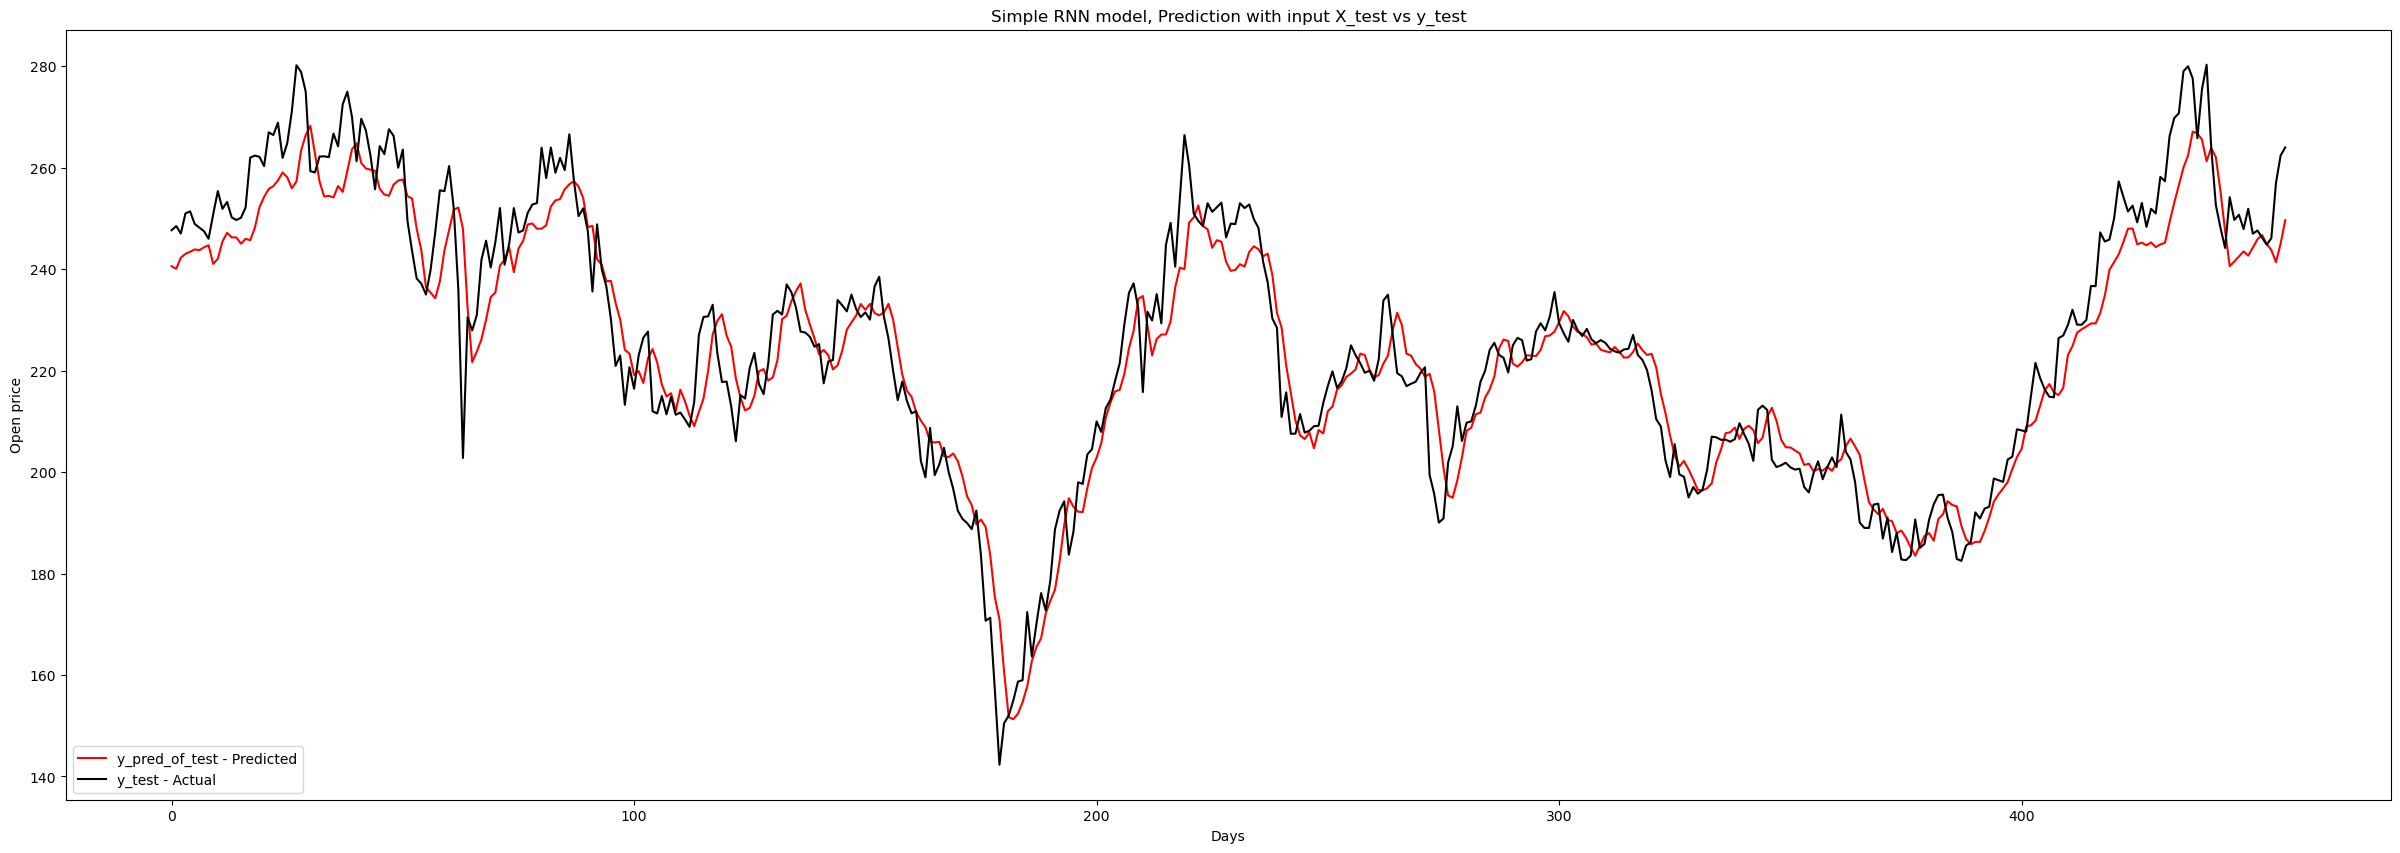

In [71]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test - Predicted", c = "red")
plt.plot(scaler.inverse_transform(y_test), label = "y_test - Actual", c = "black")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

### SIMPLE RNN MODEL - TRAIN VALIDATION - PREDICTION

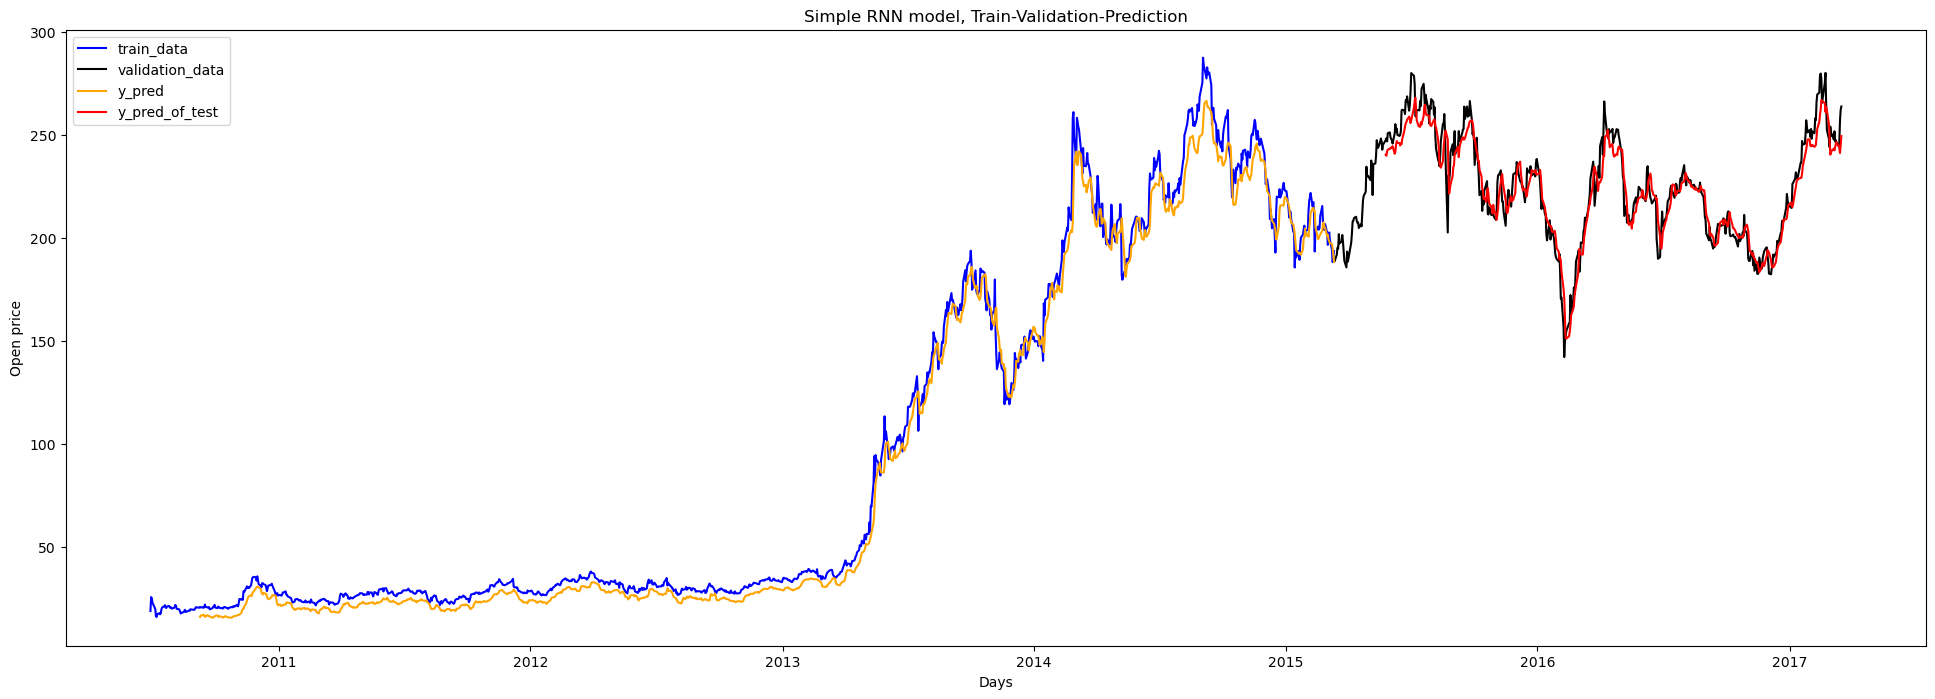

In [74]:
# Visualisation
plt.subplots(figsize =(24,8))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "blue")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "black")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "orange")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "red")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

### Creating the `LSTM` model

In [75]:
from keras.layers import LSTM

In [83]:
del model_lstm

In [122]:
model_lstm = Sequential()

### First LSTM Layer
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 LSTM Units

### Second LSTM Layer
model_lstm.add(
    LSTM(64, return_sequences= False))

### Adding Dense Layers
model_lstm.add(Dense(32)) # A fully connected layer 32 neurons # ANN hidden layer

### Output Layer with single neuron
model_lstm.add(Dense(1)) 

### Compiling the model
model_lstm.compile(loss="mean_squared_error", optimizer ="adam", metrics = ["accuracy"])


In [123]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [124]:
### Training the model
history2 = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 2.6331e-04 - loss: 0.0364
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 7.4746e-04 - loss: 0.0016
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 2.0402e-04 - loss: 0.0012
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 9.9944e-04 - loss: 0.0014
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0013 - loss: 0.0011
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.4863e-04 - loss: 0.0011
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 9.9944e-04 - loss: 9.3667e-04
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 5.1138e-04 - loss: 8.7307e-04
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 3.9605e-04 - loss: 8.0910e-04
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 5.9807e-04 - loss: 8.9859e-04
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 4.7667e-05 - loss: 8.3388e-04
Epo

In [125]:
X_test.min(), X_test.max()

(0.0, 0.9999999999999998)

In [126]:
### 10. Evaluating the LSTM model
y_pred_of_test_lstm = model_lstm.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [127]:
y_pred_of_test_lstm = scaler.inverse_transform(y_pred_of_test_lstm)

In [128]:
y_pred_of_test_lstm.min(), y_pred_of_test_lstm.max()

(34.286503, 283.63425)

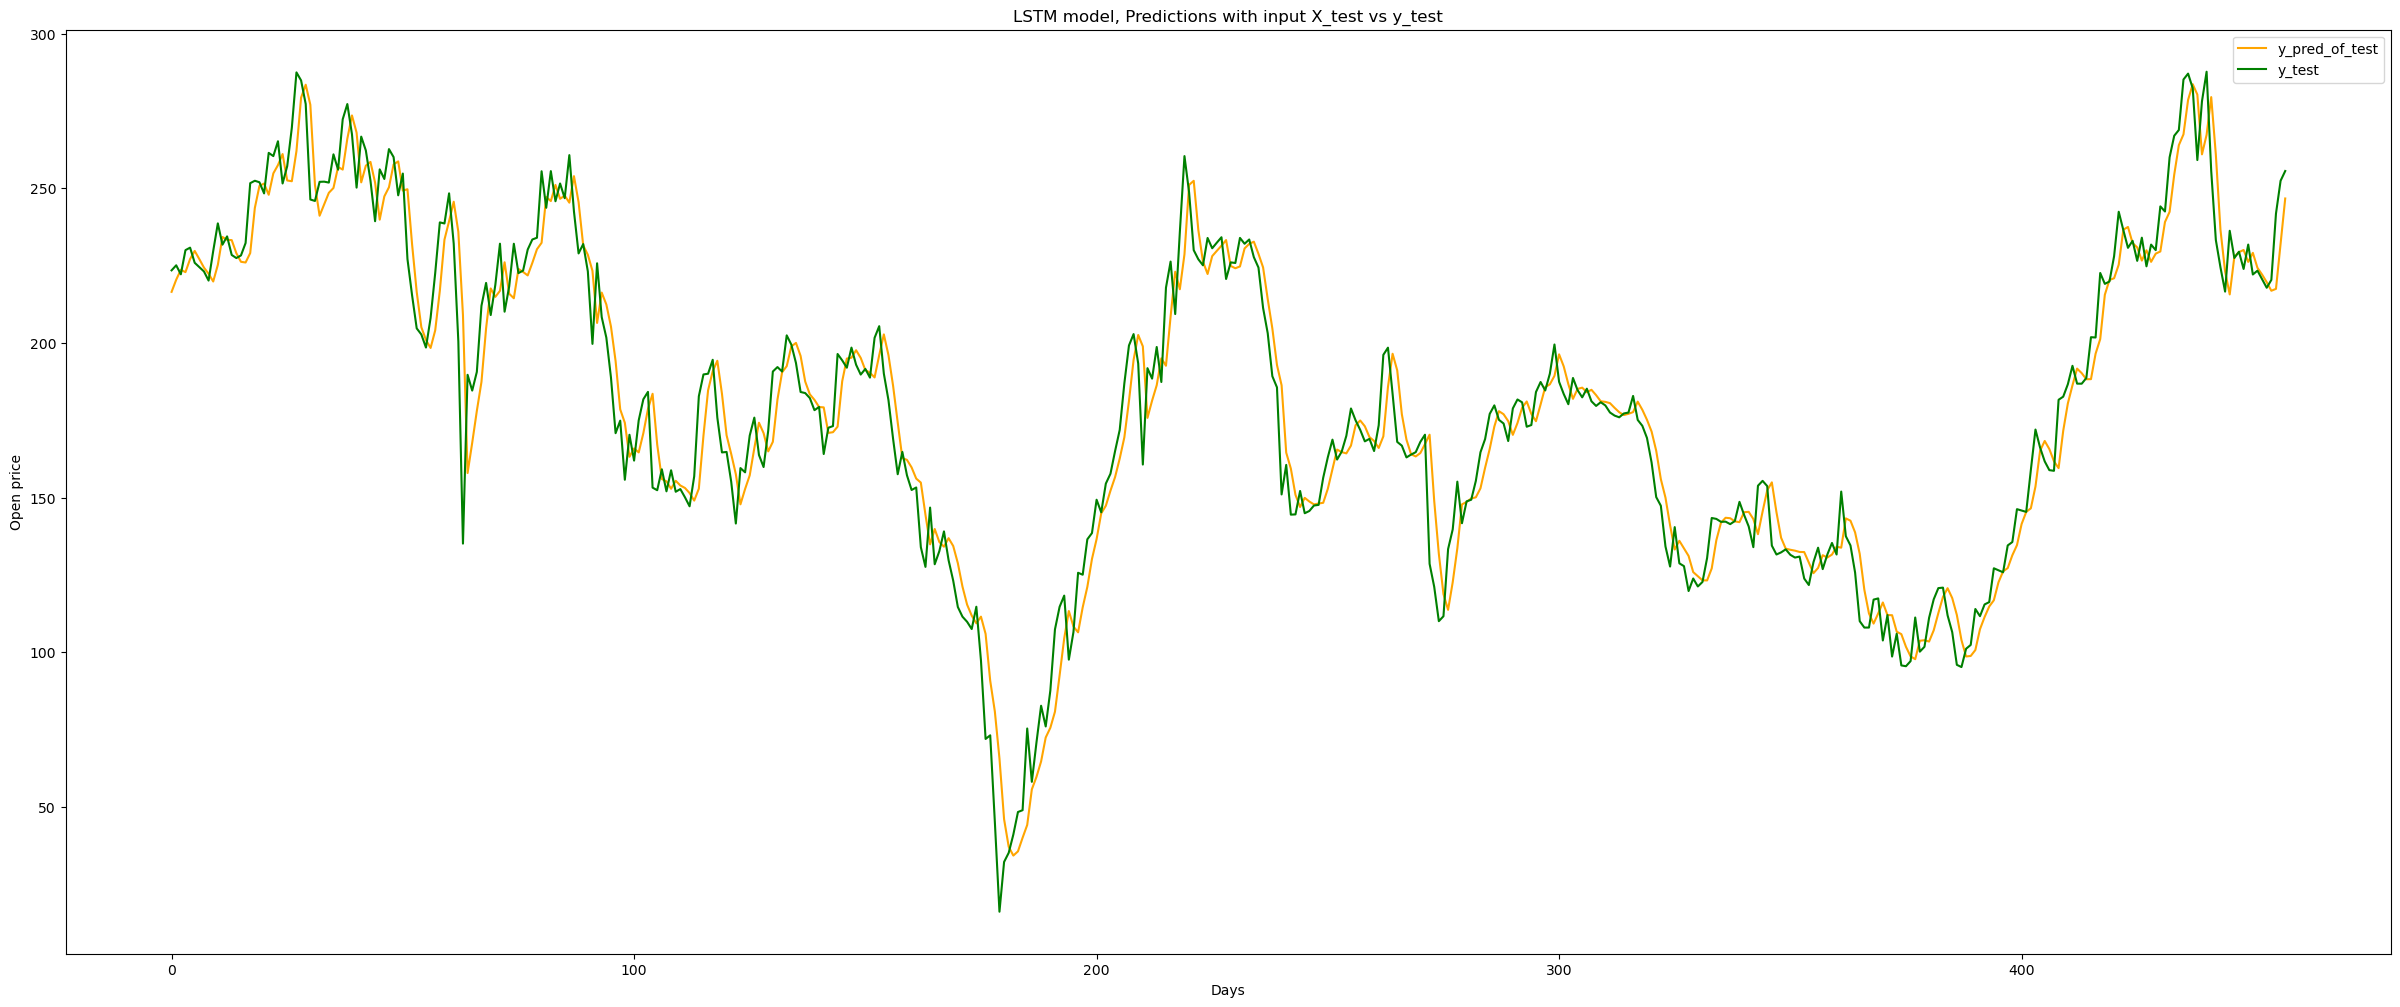

In [129]:
plt.subplots(figsize =(30,12))
plt.plot(y_pred_of_test_lstm, label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()